# Finding optimal value of the bandwidth for KDE

This solution is from sklearn webpage

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import LeaveOneOut

In [3]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

In [4]:
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut(len(x)))
grid.fit(x[:, None]);

In [5]:
grid.best_params_

{'bandwidth': 0.35111917342151316}

(-0.02, 0.4)

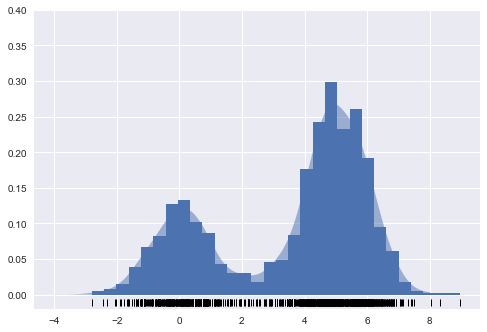

In [19]:
hist = plt.hist(x, bins=30, normed=True)
from sklearn.neighbors import KernelDensity
x_d = np.linspace(-4, 8, 1000)
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=0.35, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.4)